# Build programming fluency.

We will do this together in our next session(s).

**1**. (Review)

Find the number less than 1,000 that generates the longest Collatz sequence.

In [1]:
def f(n):
    return n//2 if n % 2 == 0 else 3*n+1

def collatz(n):
    ns = [n]
    while n != 1:
        n = f(n)
        ns.append(n)
    return ns

def find_longest(n_max):
    pairs = [(len(collatz(n)), n) for n in range(1, n_max)]
    return max(pairs)[1]

find_longest(1000)

871

**2**, (Review)

Find the length of the longest sequence of heads in 10,000 simulated tosses of a fair coin. Now repeat for a biased coin, wehre the probability of heads = 0.55. How much longer is the second run of heads than the first? 

In [2]:
import numpy as np
import re

n_tosses = 10_000

def max_run(n_tosses, p=0.5):
    tosses = np.random.choice(['H', 'T'], n_tosses, p=(p, 1-p))
    seq = ''.join(tosses)
    
    runs = re.findall('H+', seq)
    return len(max(runs, key=len))

max_run(n_tosses, p=0.55) - max_run(n_tosses)

1

**3**. 

A Pythagorean triplet is a set of postive integers $(a, b, c)$ such that $a^2 + b^2 = c^2$. For example, $(3,4,5)$ is a Pythagorean triplet. Find all Pythagorean triplets for $c < 100$.

In [3]:
def pythagorean_triplets(max_c):
    triplets = []
    for a in range(1, max_c):
        for b in range(a, max_c):
            c = np.sqrt(a**2 + b**2)
            if c >= max_c:
                continue
            if c.is_integer():
                triplets.append( (a, b, int(c)))
    return triplets

pythagorean_triplets(100)

[(3, 4, 5),
 (5, 12, 13),
 (6, 8, 10),
 (7, 24, 25),
 (8, 15, 17),
 (9, 12, 15),
 (9, 40, 41),
 (10, 24, 26),
 (11, 60, 61),
 (12, 16, 20),
 (12, 35, 37),
 (13, 84, 85),
 (14, 48, 50),
 (15, 20, 25),
 (15, 36, 39),
 (16, 30, 34),
 (16, 63, 65),
 (18, 24, 30),
 (18, 80, 82),
 (20, 21, 29),
 (20, 48, 52),
 (21, 28, 35),
 (21, 72, 75),
 (24, 32, 40),
 (24, 45, 51),
 (24, 70, 74),
 (25, 60, 65),
 (27, 36, 45),
 (28, 45, 53),
 (30, 40, 50),
 (30, 72, 78),
 (32, 60, 68),
 (33, 44, 55),
 (33, 56, 65),
 (35, 84, 91),
 (36, 48, 60),
 (36, 77, 85),
 (39, 52, 65),
 (39, 80, 89),
 (40, 42, 58),
 (40, 75, 85),
 (42, 56, 70),
 (45, 60, 75),
 (48, 55, 73),
 (48, 64, 80),
 (51, 68, 85),
 (54, 72, 90),
 (57, 76, 95),
 (60, 63, 87),
 (65, 72, 97)]

**4**. 

In the game craps, you roll two 6-sided dice. Firstt roll — You win if a 7 or 11 roll, or lose if 2, 3, or 12 roll (known as “craps”). Any other number that rolls becomes the “point” and the point must roll again before a 7 to win.

Simulate 1,000 games of craps to estimate your probability of winning.

In [4]:
import numpy as np

def craps():
    """Return 1 for win and 0 for lose."""
    
    point = sum(np.random.choice(range(1,7), 2))

    rolls = [point] # for debugging

    if point in (7, 11):
        return (1, rolls)
    elif point in (2, 3, 12):
        return (0, rolls)
    else:
        roll = sum(np.random.choice(range(1,7), 2))
        rolls.append(roll) # for debugging
        while roll not in (point, 7):
            roll = sum(np.random.choice(range(1,7), 2))
            rolls.append(roll) # for debugging
        if roll == point:
            return (1, rolls)
        else:
            return (0, rolls)

# for debugging
for i in range(10):
    print(craps())

n_games = 1000
games = [craps()[0] for i in range(n_games)]
sum(games)/n_games

(1, [6, 6])
(1, [8, 4, 8])
(1, [10, 10])
(1, [11])
(0, [5, 10, 7])
(1, [7])
(1, [7])
(0, [6, 7])
(0, [5, 8, 9, 4, 2, 8, 7])
(1, [11])


0.475

**5**.

Work wiht the Pokemon DataFrame provided below.

1. Create a DataFrame called `df_legend` containing only Legendary Pokemon. Each question after this will use the new DataFrame that you created and not the origianl.
2. What is the average speed of each Generation?
3. What is the most common `Type 1` class ?
4. Find all Pokeon whose names begin wiht the letter `A` or ends in a vowel.
5. Create a new DataFrame by removing all Pokemon that have *any* missing data.

In [5]:
import pandas as pd

url = 'https://rb.gy/u5avn'
df = pd.read_csv(url, index_col=0)
df.sample(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
440,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False
366,Clamperl,Water,NaN,345,35,64,85,74,55,32,3,False
433,Chingling,Psychic,NaN,285,45,30,50,65,50,45,4,False
629,Vullaby,Dark,Flying,370,70,55,75,45,65,60,5,False
376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3,False
207,Gligar,Ground,Flying,430,65,75,105,35,65,85,2,False
679,Honedge,Steel,Ghost,325,45,80,100,35,37,28,6,False
520,Tranquill,Normal,Flying,358,62,77,62,50,42,65,5,False
502,Dewott,Water,NaN,413,75,75,60,83,60,60,5,False


1. Create a DataFrame called `df_legend` containing only Legendary Pokemon. Each question after this will use the new DataFrame that you created and not the origianl.


In [6]:
idx = df.Legendary == True
df_legend = df[idx]
df_legend.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


2. What is the average speed of each Generation?


In [7]:
df_legend.groupby('Generation')[['Speed']].mean()

,Speed
Generation,
1,112.500000
2,100.000000
3,101.666667
4,100.692308
5,101.666667
6,84.125000




3. What is the most common `Type 1` class ?



In [8]:
df_legend[['Type 1']].mode()

,Type 1
0,Psychic


In [9]:
counts = df_legend.groupby(['Type 1'])['Name'].count()
counts.sort_values(ascending=False).head(1)

Type 1
Psychic    14
Name: Name, dtype: int64

4. Find all Pokeon whose names begin wiht the letter `A` or ends in a vowel.


In [10]:
help(df_legend.Name.str.endswith)

Help on method endswith in module pandas.core.strings.accessor:

endswith(pat: 'str | tuple[str, ...]', na: 'Scalar | None' = None) -> 'Series | Index' method of pandas.core.strings.accessor.StringMethods instance
    Test if the end of each string element matches a pattern.
    
    Equivalent to :meth:`str.endswith`.
    
    Parameters
    ----------
    pat : str or tuple[str, ...]
        Character sequence or tuple of strings. Regular expressions are not
        accepted.
    na : object, default NaN
        Object shown if element tested is not a string. The default depends
        on dtype of the array. For object-dtype, ``numpy.nan`` is used.
        For ``StringDtype``, ``pandas.NA`` is used.
    
    Returns
    -------
    Series or Index of bool
        A Series of booleans indicating whether the given pattern matches
        the end of each string element.
    
    See Also
    --------
    str.endswith : Python standard library string method.
    Series.str.startswith : 

In [11]:
idx1 = df_legend.Name.str.startswith('A')
idx2 = df_legend.Name.str.endswith(tuple('aeiou'))
df_legend[idx1 | idx2]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True



5. Create a new DataFrame by removing all Pokemon that have *any* missing data.

In [12]:
df_legend_clean = df_legend.dropna()

**6**.

Use the `df_legend` DataFrame from Exercise 5.1

1. Using `seaborn`, create a grid of `violin` plots where each column shows a differnet `Type 1` class, the `x` axis is for `Generation` and the `y` axis is for `Defense`. Do not show more than 4 columns per row.
2. Create a `tall` dataFrame where the `id_vars` are `Name` and `Type 1`, and the variables and values are from the `HP, Attack, Defense` columns.
3. Using `seaborn`, create 3 columns of `swarm` plots - one each for `HP`, `Attack`, or `Defense`. Each plot should show `Type 1` class on the x-axis, and the distribution of the values relevant for that column — i.e., values for `HP`, `Attack`, or `Defense`. Only use the 5 most common Type 1 Pokemon. Giv each of the 5 types a differnt color.

1. Using `seaborn`, create a grid of `violin` plots where each column shows a differnet `Type 1` class, the `x` axis is for `Generation` and the `y` axis is for `Defense`. Do not show more than 4 columns per row.

In [13]:
import seaborn as sns

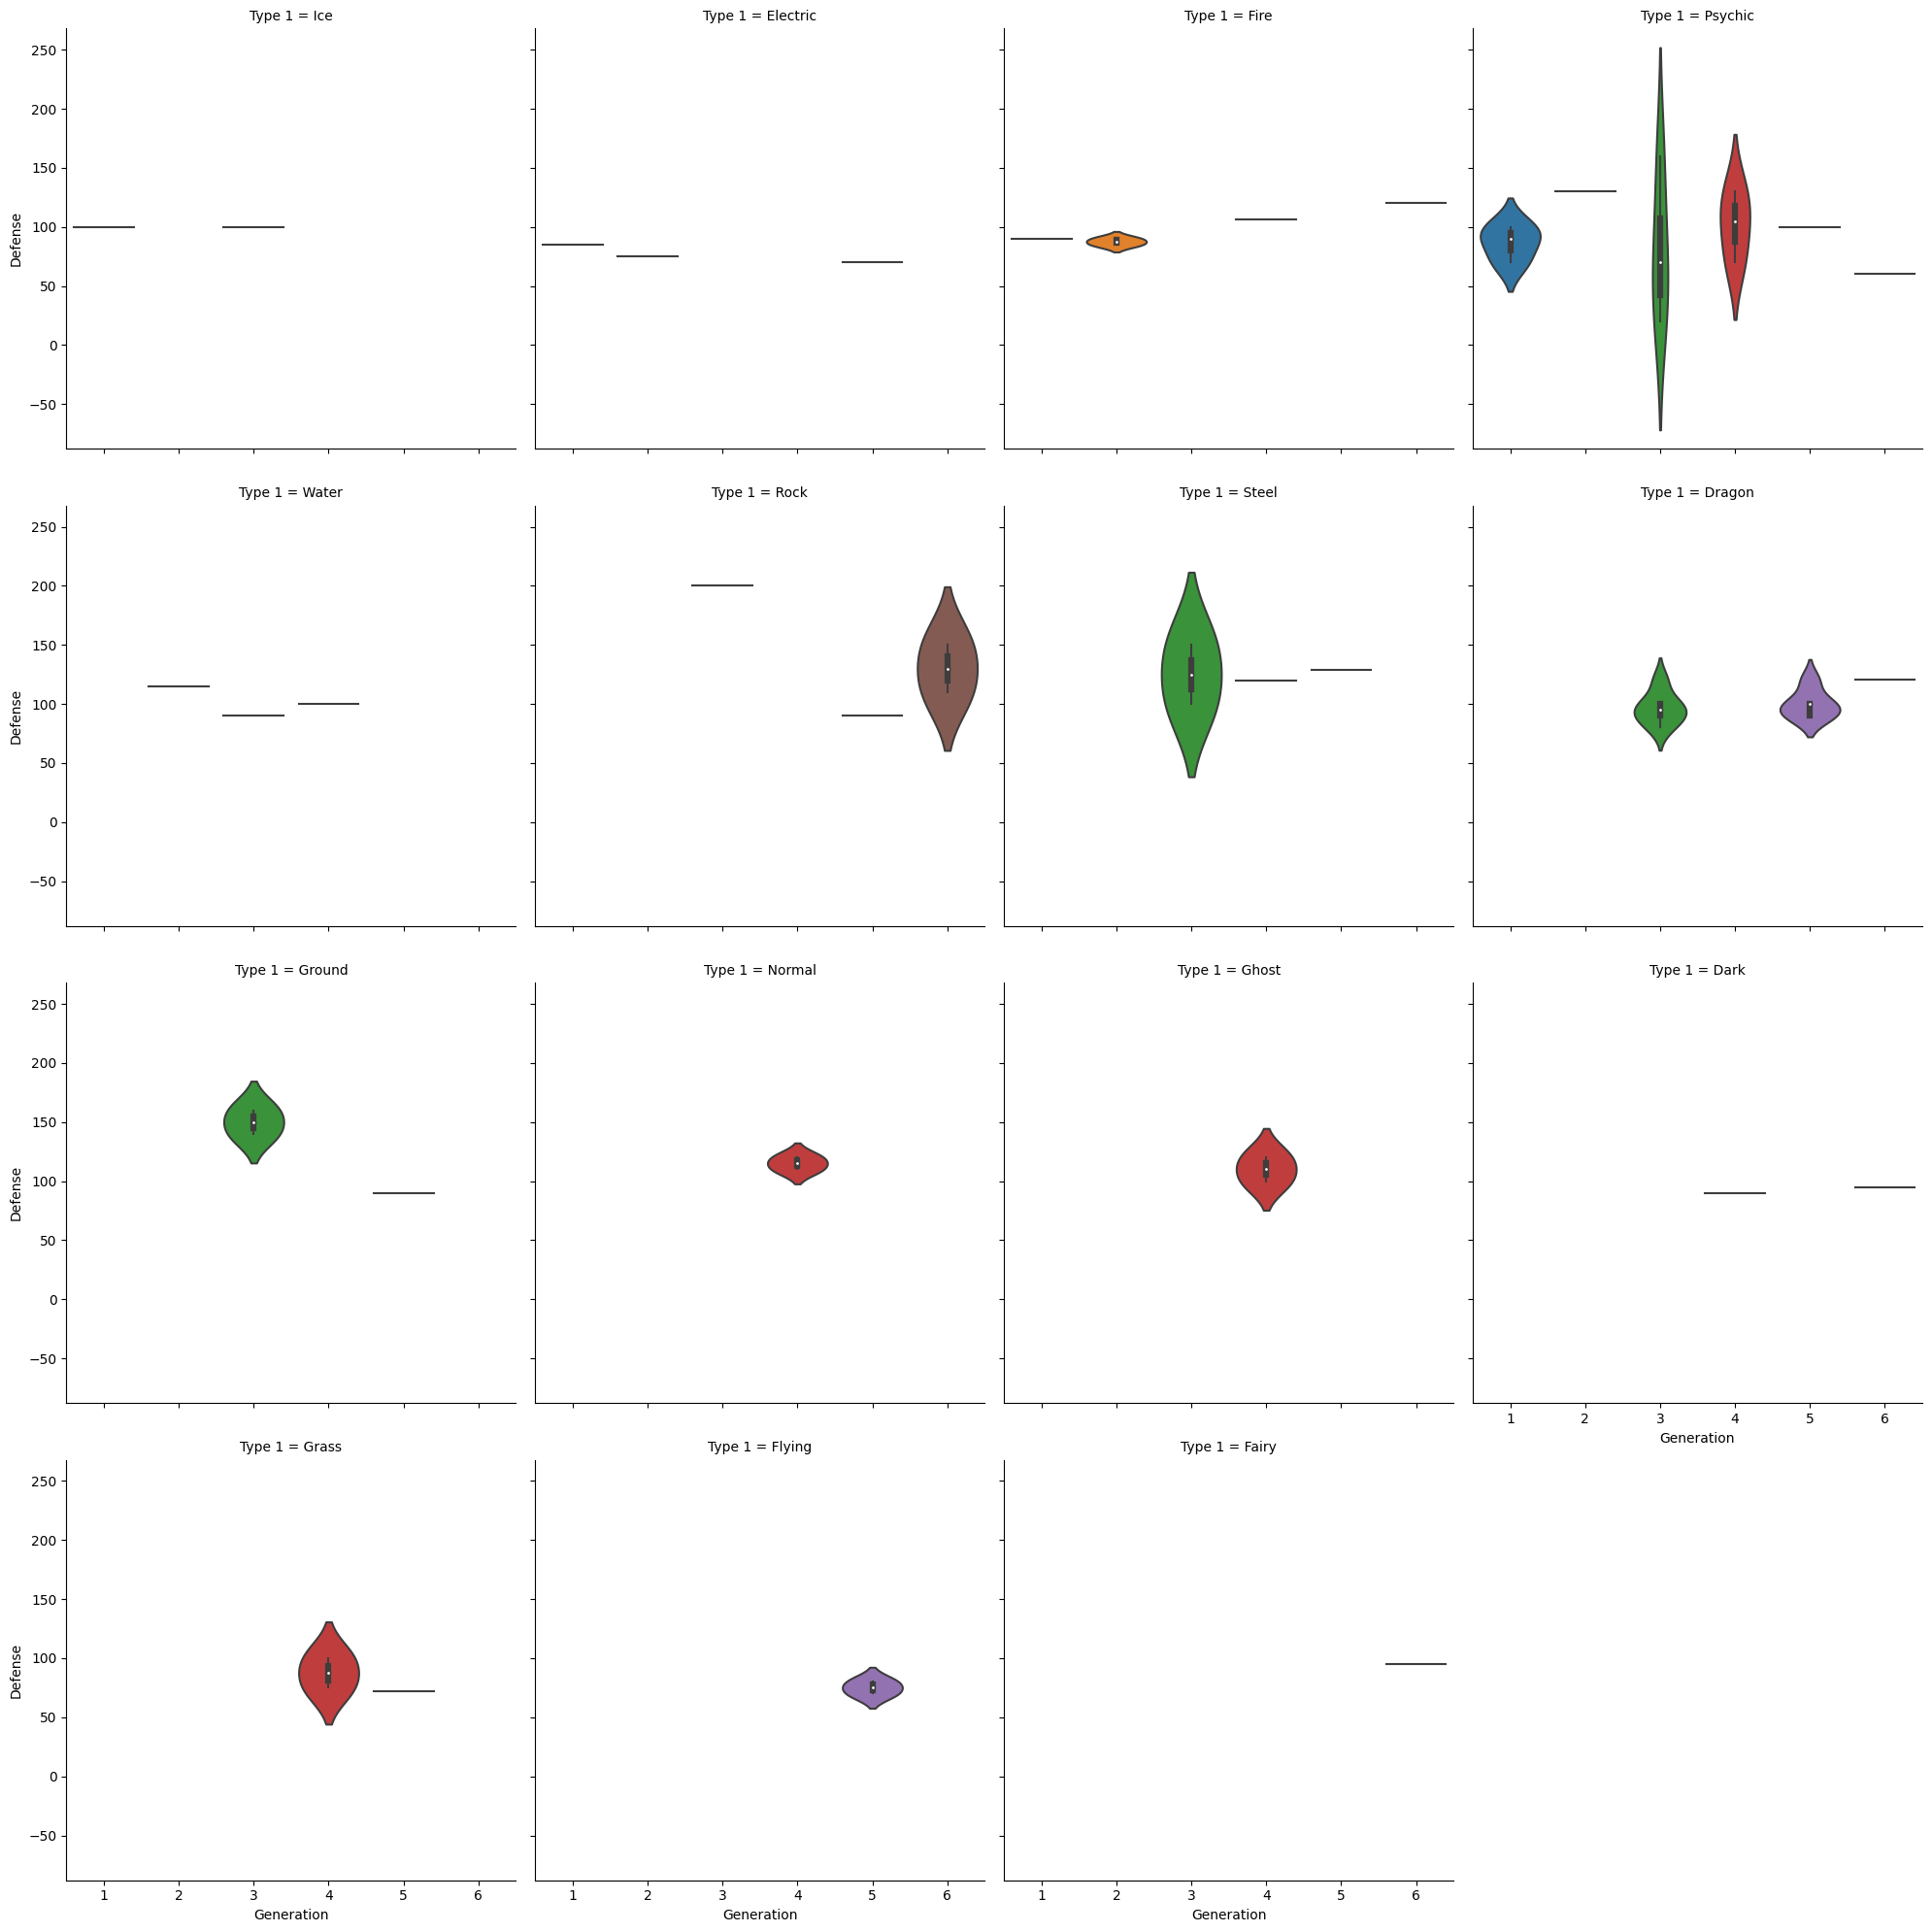

In [14]:
g = sns.catplot(df_legend, col='Type 1', col_wrap=4, x='Generation', y='Defense', kind='violin')

2. Create a `tall` dataFrame where the `id_vars` are `Name` and `Type 1`, and the variables and values are from the `HP, Attack, Defense` columns.

In [15]:
df_legeend_tall = pd.melt(df_legend, id_vars=['Name', 'Type 1'], value_vars=['HP', 'Attack', 'Defense'])
df_legeend_tall.sample(5)

,Name,Type 1,variable,value
149,KyogrePrimal Kyogre,Water,Defense,90
136,Raikou,Electric,Defense,75
50,Reshiram,Dragon,HP,100
83,Kyogre,Water,Attack,100
172,Victini,Psychic,Defense,100


3. Using `seaborn`, create 3 columns of `swarm` plots - one each for `HP`, `Attack`, or `Defense`. Each plot should show `Type 1` class on the x-axis, and the distribution of the values relevant for that column — i.e., values for `HP`, `Attack`, or `Defense`. Only use the 5 most common Type 1 Pokemon. Giv each of the 5 types a differnt color.

In [16]:
top5 = tuple(counts.sort_values(ascending=False).head(5).index)
top5

('Psychic', 'Dragon', 'Fire', 'Electric', 'Ground')

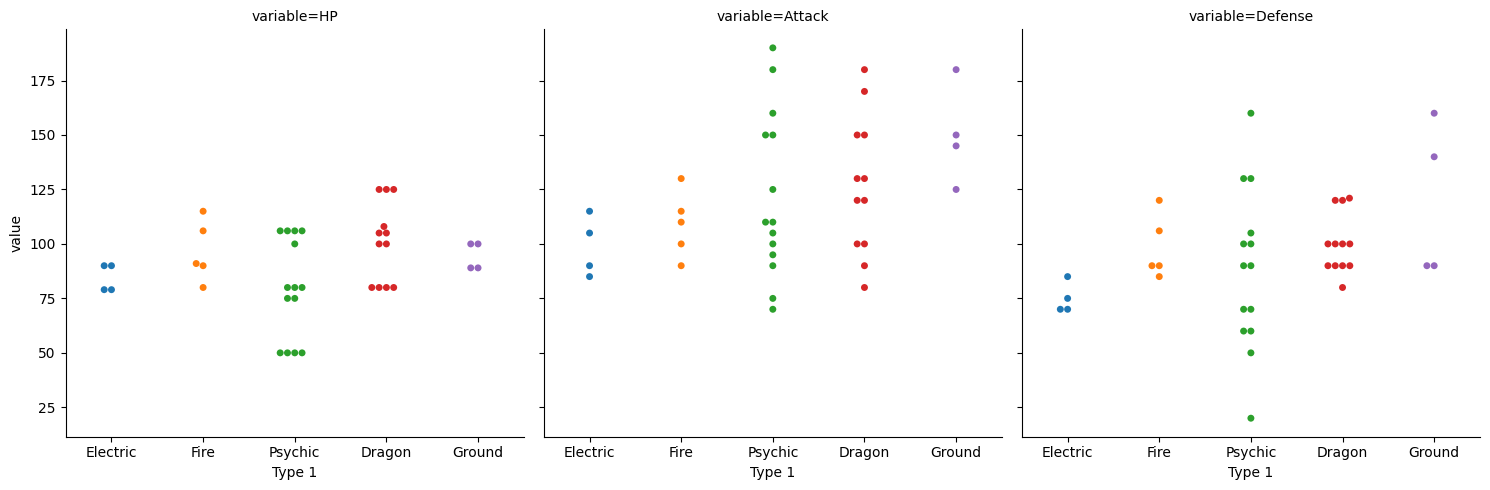

In [28]:
g = sns.catplot(
    data = df_legeend_tall[df_legeend_tall['Type 1'].isin(top5)],
    col='variable', 
    x='Type 1', 
    y='value', 
    hue='Type 1',
    kind='swarm')
g.set_titles('{col_var}={col_name}')
pass